## Getting data into Scanpy

In [11]:
import scanpy as sc

In [67]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [68]:
adata.var_names_make_unique()

In [15]:
# adata_filter = sc.pp.recipe_zheng17(adata)

In [69]:
sc.tl.pca(adata)

In [45]:
adata.obs

,n_counts_all
AAACCCAAGCAACTCT-1,1421.0
AAACCCACACGCGGTT-1,5833.0
AAACCCACAGCATACT-1,2978.0
AAACCCACATACCATG-1,3599.0
AAACCCAGTCGCACAC-1,9152.0
...,...
TTTGTTGGTAGCTAAA-1,9756.0
TTTGTTGGTATCCCAA-1,4231.0
TTTGTTGGTCCGAAAG-1,2415.0
TTTGTTGGTTCAACGT-1,6103.0


In [34]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

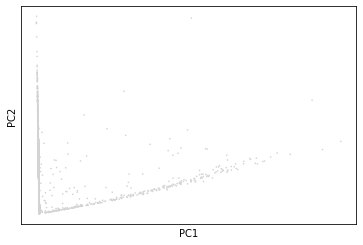

In [39]:
sc.pl.pca(adata)

In [48]:
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [49]:
adata.var_names_make_unique()

In [70]:
sc.pp.recipe_zheng17(adata)

In [71]:
sc.tl.pca(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


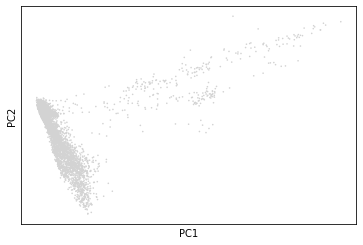

In [44]:
sc.pl.pca(adata)

## Step 2: Clustering
### Use leiden clustering to identify clusters in the data. 

In [72]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

In [56]:
adata.var_names

Index(['Sox17', 'Oprk1', 'Ptpn18', '1500015O10Rik', 'Col3a1', 'Slc40a1',
       'Gm28826', 'Cavin2', 'Gm553', 'Nrp2',
       ...
       'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l', 'mt-Nd4',
       'mt-Cytb', 'AC149090.1', 'CAAA01147332.1'],
      dtype='object', length=999)

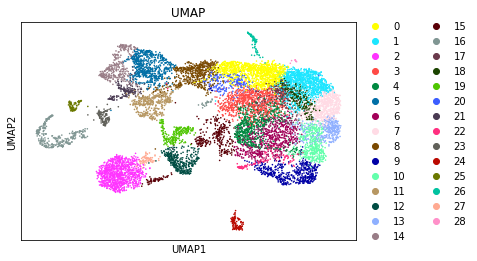

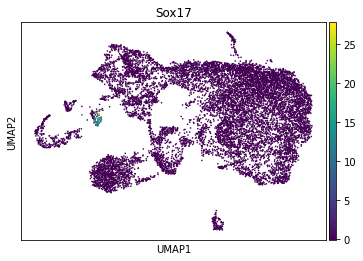

In [98]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = 'leiden' , title = "UMAP")
sc.pl.umap(adata, color = 'Sox17' , title = "Sox17")

... storing 'feature_types' as categorical
... storing 'genome' as categorical


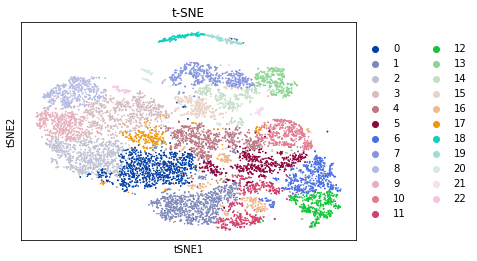

In [66]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color = 'leiden', title = "t-SNE")

## Step 3: Distinguishing genes


Identify and plot genes that distinguish each cluster. Use both the t-test and logistic regression approaches, implemented through the rank_genes_groups function.

In [77]:
sc.tl.rank_genes_groups(adata,groupby = 'leiden', method='t-test', copy = True)

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


AnnData object with n_obs × n_vars = 11843 × 999
    obs: 'n_counts_all', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mean', 'std'
    uns: 'pca', 'log1p', 'neighbors', 'leiden', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

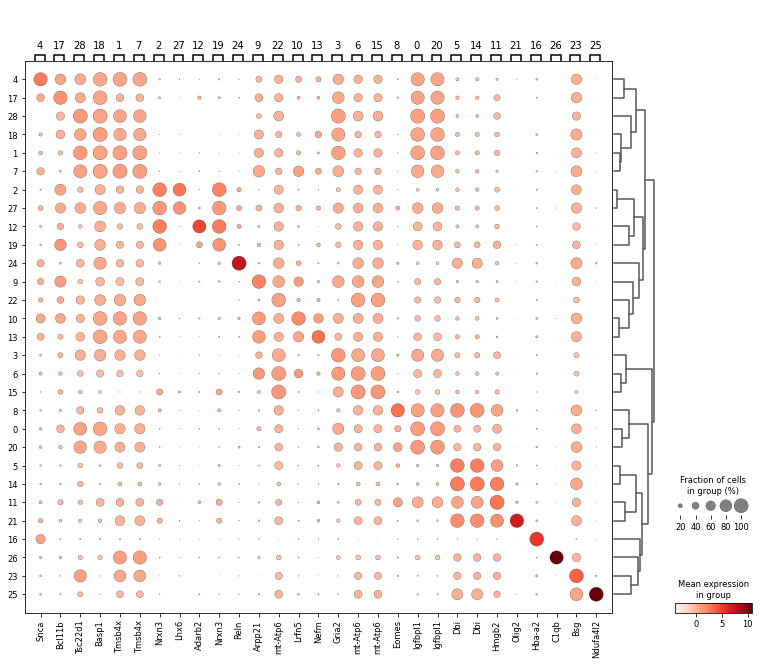

In [88]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 1)

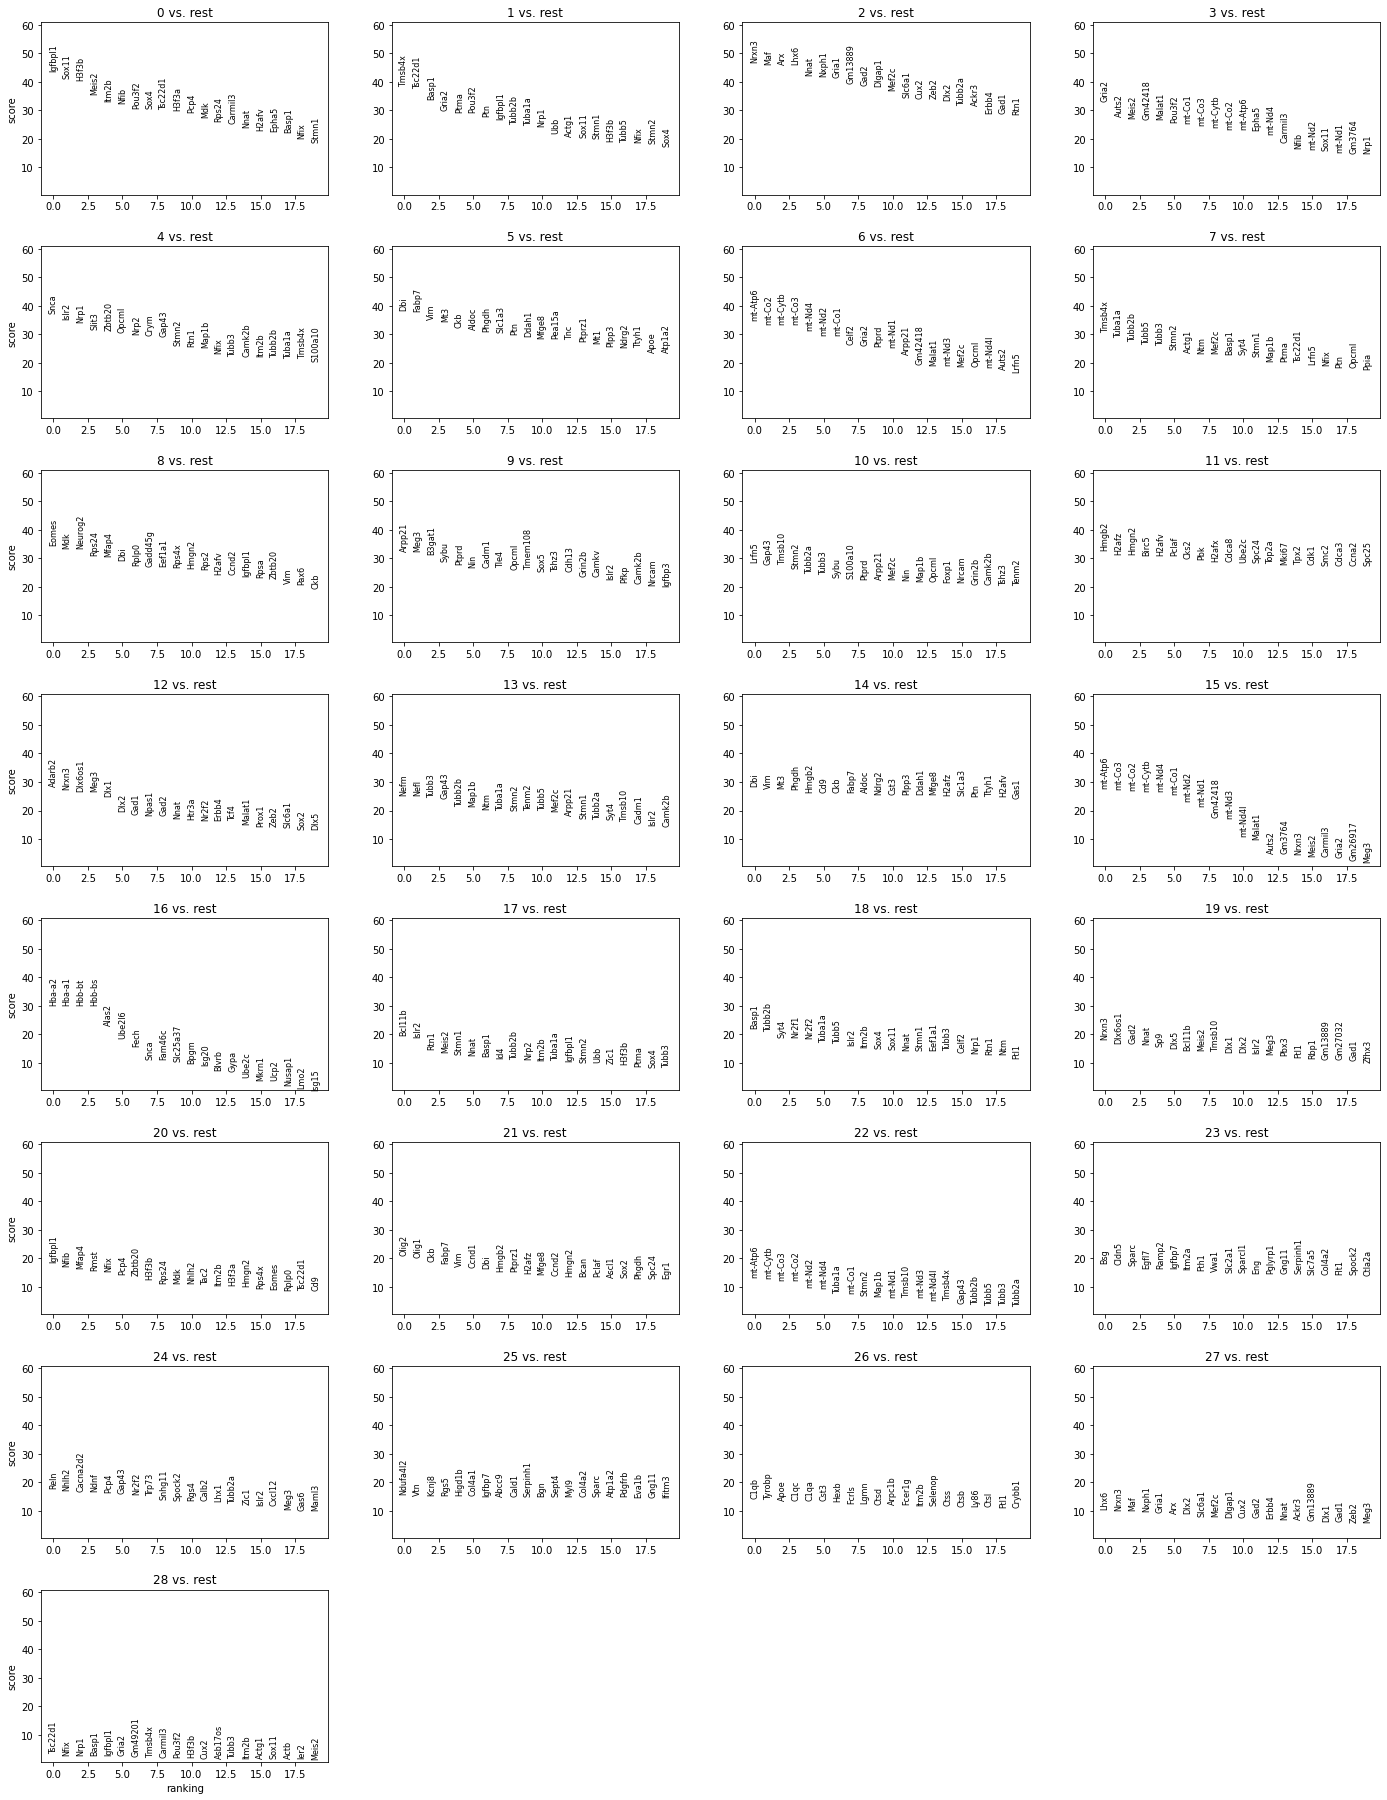

In [89]:
sc.pl.rank_genes_groups(adata)

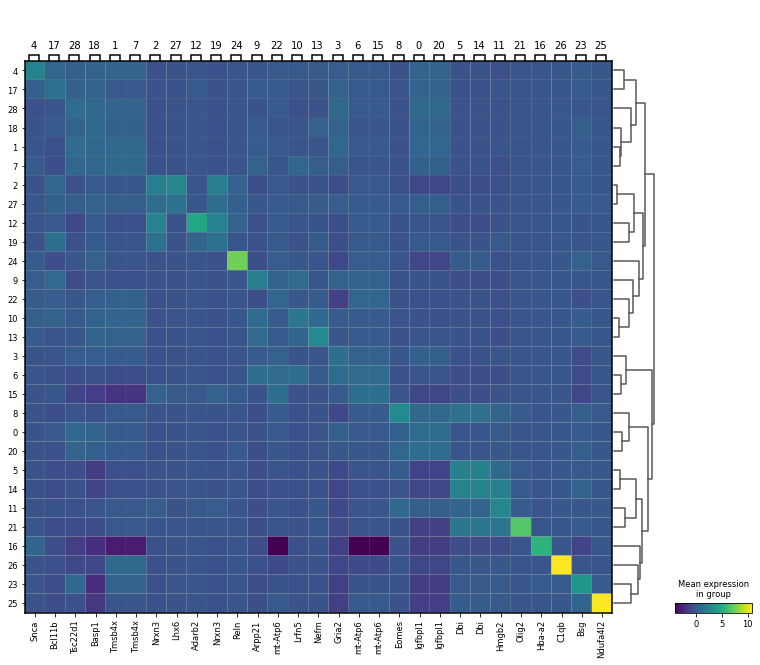

In [107]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes = 1)

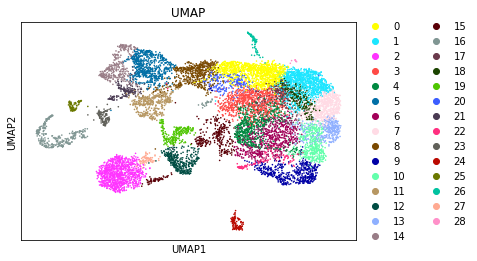

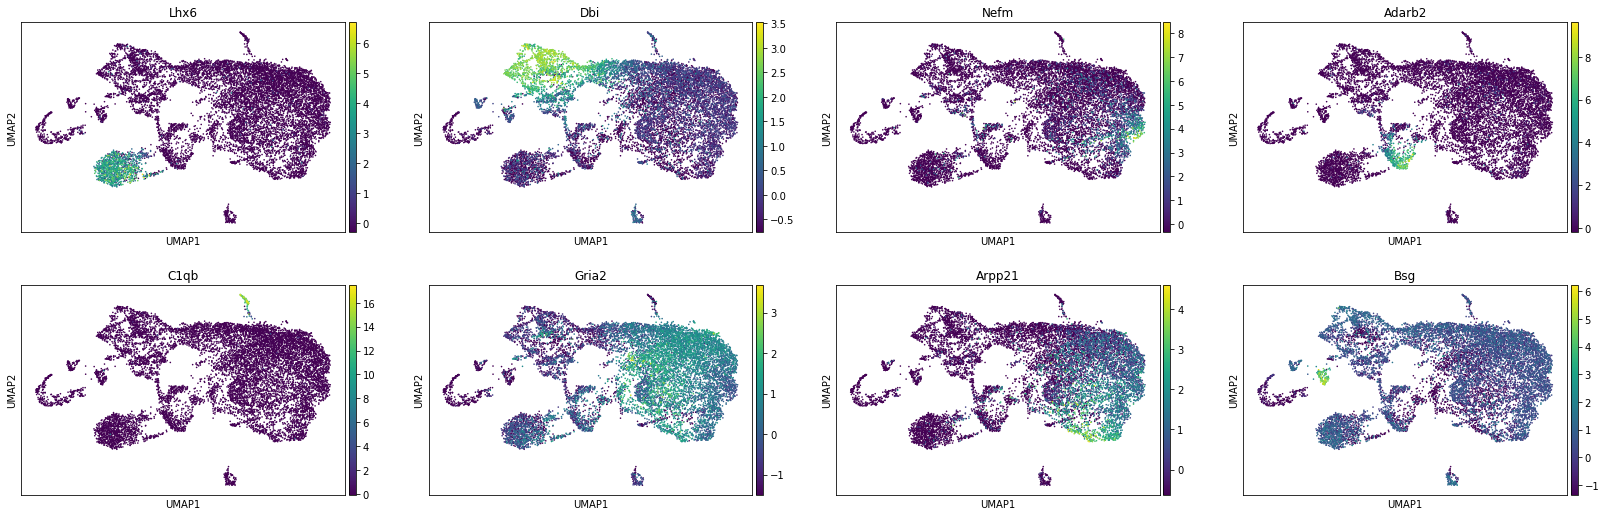

In [114]:
sc.pl.umap(adata, color = 'leiden' , title = "UMAP")
sc.pl.umap(adata, color = ['Lhx6', "Dbi", "Nefm", "Adarb2", "C1qb", "Gria2", "Arpp21", "Bsg"] , 
           title = ['Lhx6', "Dbi", "Nefm", "Adarb2", "C1qb", "Gria2", "Arpp21", "Bsg"])